
## Wine data 
#### These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from Six different qualities. The analysis determined the quantities of 12 constituents found in each of the wines.

#### Finally, the test data divided into 6 kinds and I get the 95% accuracy.


In [1]:
import io
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!

from sklearn import metrics

/Users/james/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/james/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/james/anaconda3/lib/python

In [2]:
#load the data
data = pd.read_csv('winedata/winequality-red.csv')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
#check null 
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [5]:
data.shape

(1599, 12)

In [6]:
#show the data description
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#check the count of each quality
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

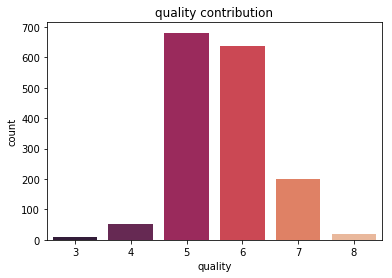

In [8]:
score = data.groupby("quality").agg({"fixed acidity": lambda x: len(x)})
score = score.reset_index()
score.columns = ["quality","count"]
sns.barplot(x = 'quality', y = 'count', data = score, palette="rocket").set_title("quality contribution")
plt.show()

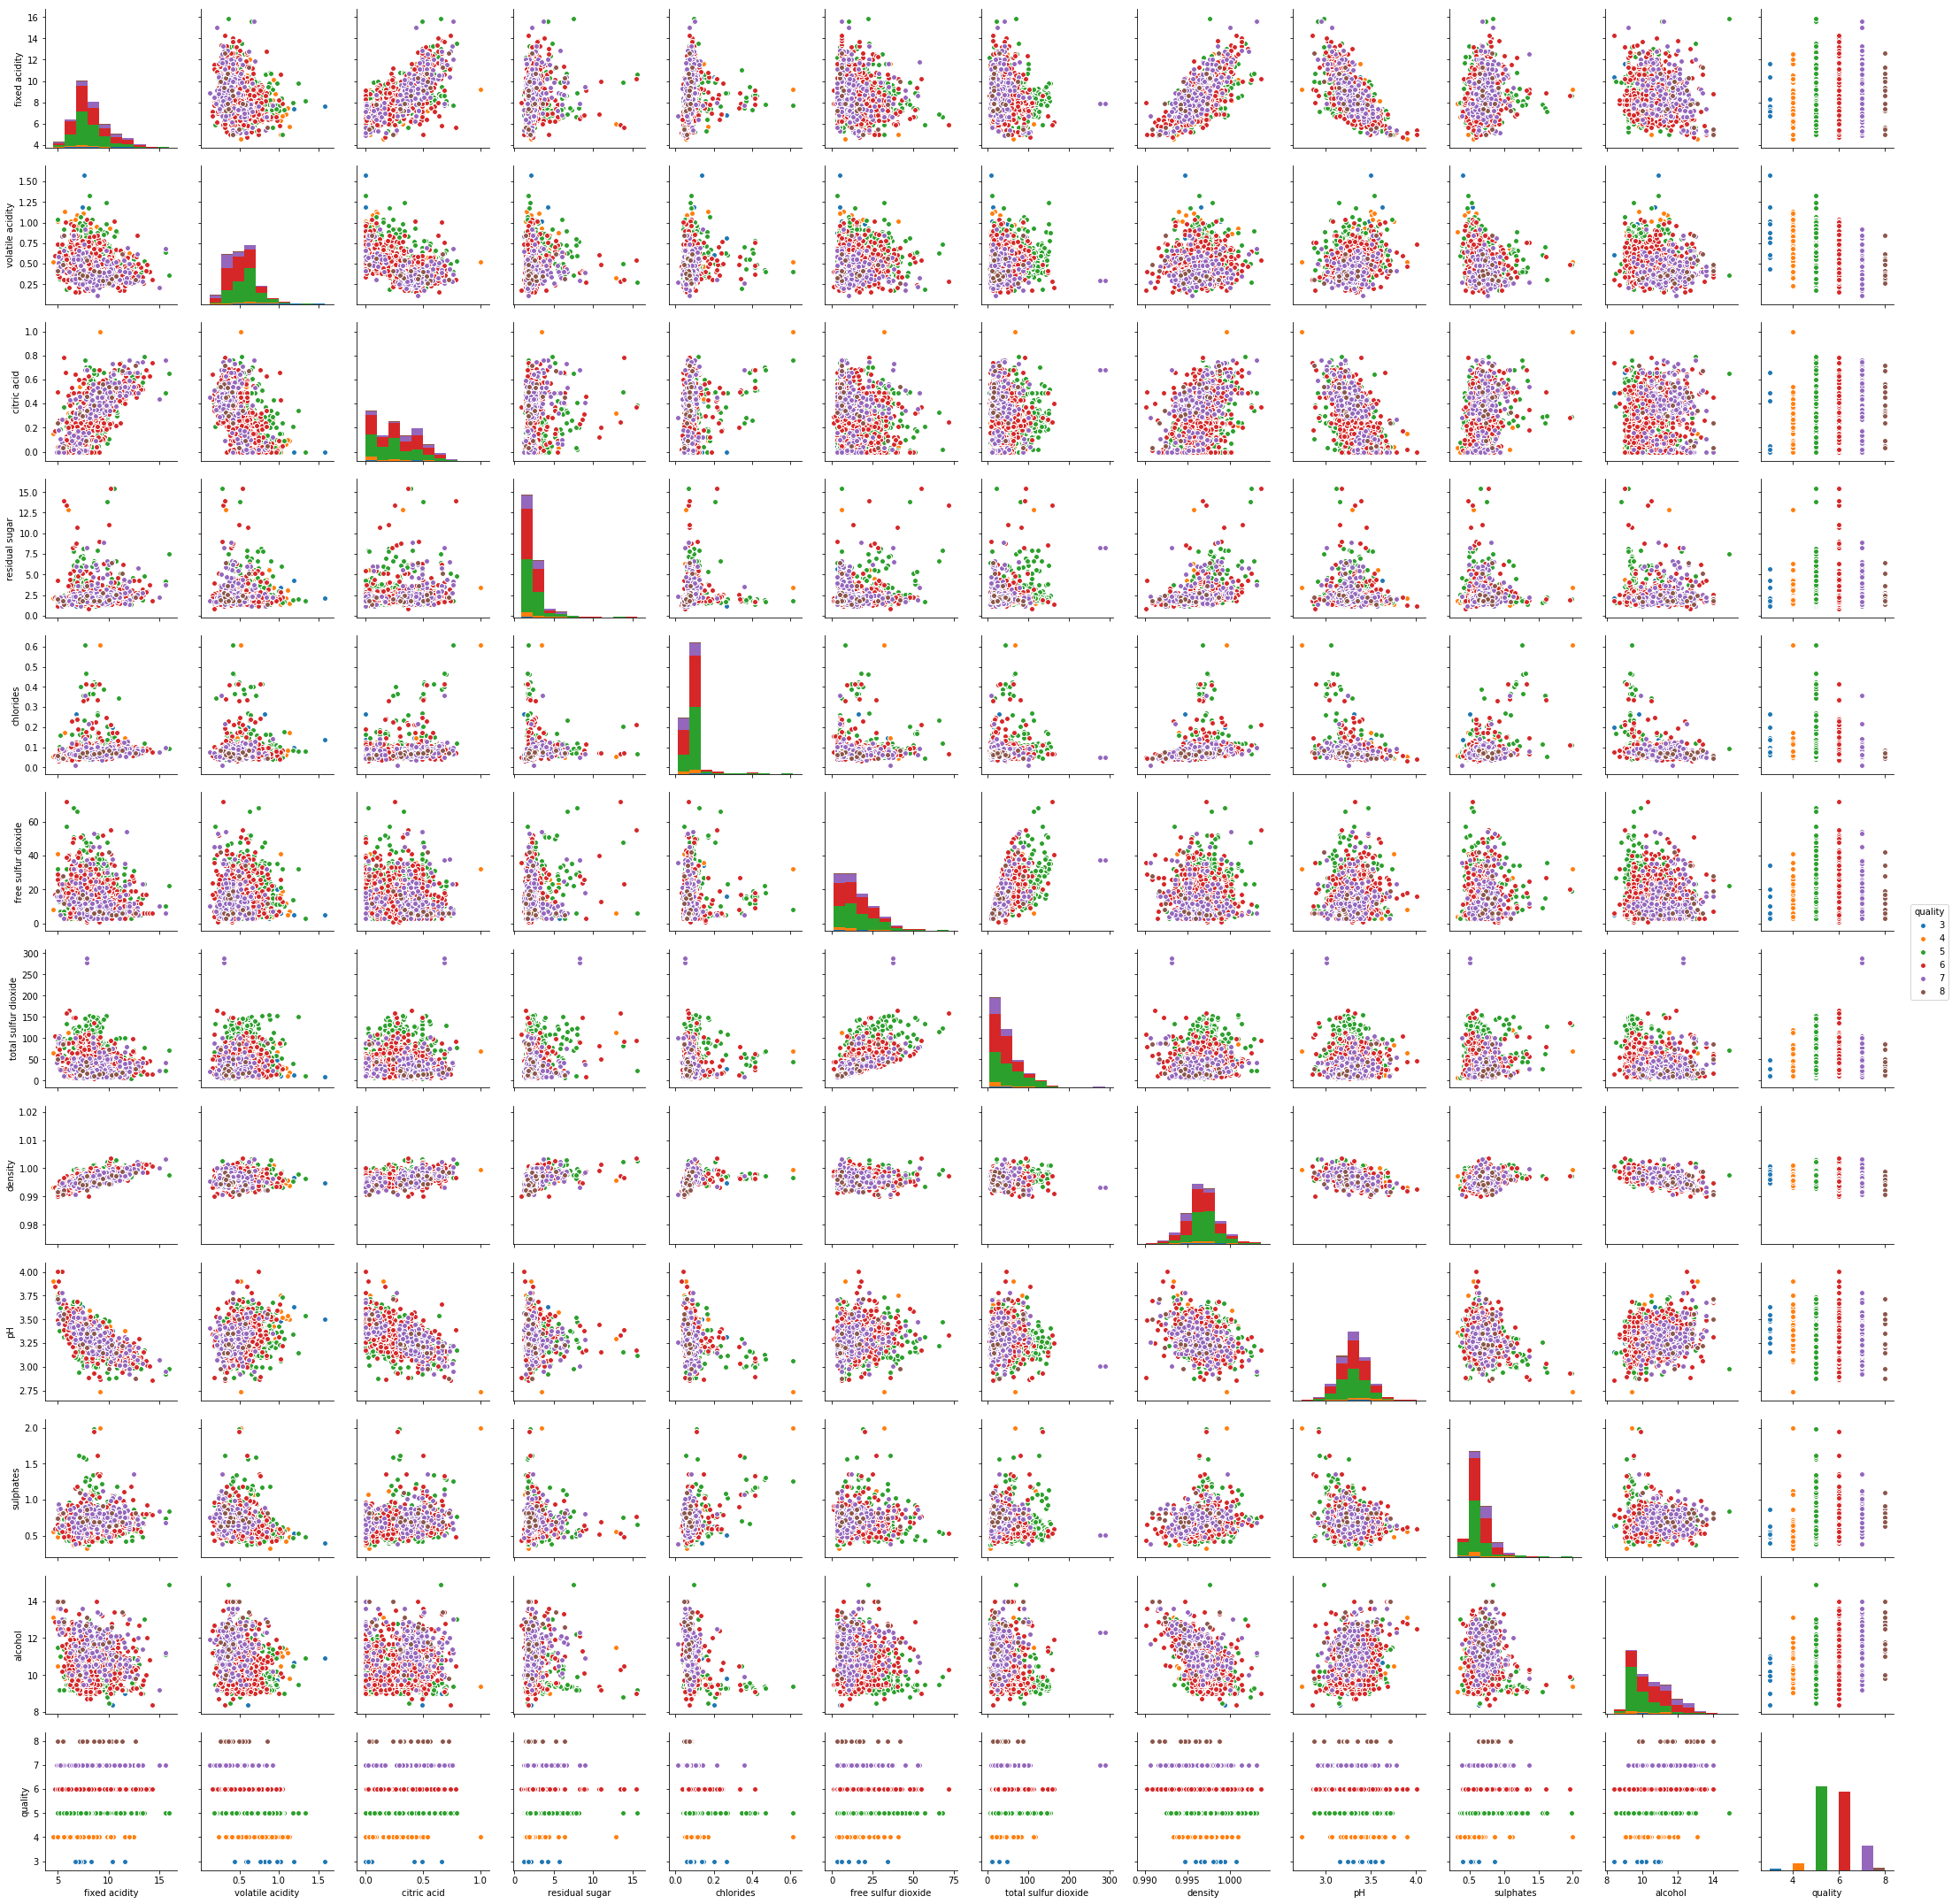

In [9]:
# compare each two characteristic in scatter plot
# colors depends on qualities 
sns.pairplot(data, hue="quality")

In [10]:
#using normalization can improve the correct accuracy rate significantly.
def normalize(df):
    return (df - df.mean()) / (df.max() - df.min())

In [11]:
#data normalization
wine_normalized = data.iloc[:,1:13].apply(normalize)
wine_normalized.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205
1,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844,-0.127205
2,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844,-0.127205
3,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844,0.072795
4,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382,-0.127205


In [12]:
X = wine_normalized
#setting target
y = data.quality

In [13]:
#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [14]:
X_train.shape,X_test.shape, y_train.shape

((959, 11), (640, 11), (959,))

In [15]:
from sklearn.neighbors import KNeighborsClassifier

#initilization
k = 3
clf = KNeighborsClassifier(k)

#traning
clf.fit(X_train, y_train)
print("training set acc：{}%".format(round(clf.score(X_train, y_train)*100,2)))

training set acc：96.45%


In [16]:
# cross validation  acc
from sklearn import cross_validation as cv
scores = cv.cross_val_score(clf, X_train, y_train, cv = 5)
score = scores.mean()
print("cv acc：{}%".format(round(score*100, 2)))

cv acc：91.46%


In [17]:
# selecting the best k
ks = range(1,100)
inSampleScores = []
crossValidationScores = []
d = {} #key = k, value = cv accuracy rate

for k in ks:
    clf = KNeighborsClassifier(k).fit(X_train, y_train)
    inSampleScores.append(clf.score(X_train, y_train))
    scores = cv.cross_val_score(clf, X_train, y_train, cv = 5)
    crossValidationScores.append(scores.mean())
    d[k] = scores.mean()

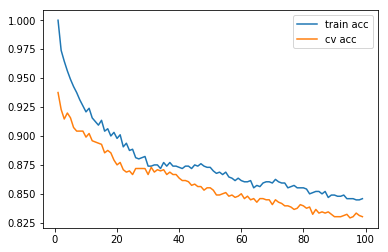

In [18]:
import matplotlib.pyplot as plt

p1 = plt.plot(ks, inSampleScores)
p2 = plt.plot(ks, crossValidationScores)
plt.legend(["train acc", "cv acc"])
plt.show()

In [19]:
inSampleScores.sort

<function list.sort>

In [20]:
best_k = sorted(d.items(), key = lambda x:x[1], reverse = True)[0][0]
print("best k：{}".format(best_k))

best k：1


In [21]:
#model
clf = KNeighborsClassifier(best_k).fit(X_train, y_train)

#prediction
y_test_pred = clf.predict(X_test)

#test acc
print("test acc：{}%".format(round(clf.score(X_test, y_test)*100, 2)))

test acc：95.47%


In [22]:
# evalution report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          3       1.00      0.25      0.40         4
          4       0.80      0.70      0.74        23
          5       0.96      0.97      0.96       279
          6       0.97      0.98      0.97       268
          7       0.94      0.97      0.95        60
          8       1.00      0.33      0.50         6

avg / total       0.95      0.95      0.95       640

